In [1]:
import os, sys
sys.path.append(os.path.dirname(os.getcwd()))

In [6]:
from module.prediction import load_perturbation
import networkx as nx
import numpy as np
import torch
import matplotlib.pyplot as plt
from torch_geometric.datasets import TUDataset

bernoulli_pert = load_perturbation("bernoulli")
community_pert = load_perturbation("community")

In [8]:
dataset = TUDataset(root = ".", name='MUTAG')

Extracting ./MUTAG/MUTAG.zip
Processing...
Done!


In [9]:
dataset[0]

Data(edge_attr=[38, 4], edge_index=[2, 38], x=[17, 7], y=[1])

In [4]:
sizes = [10,10]
p = [[0.4, 0.05],[0.05, 0.4]]

In [30]:
g = nx.generators.community.stochastic_block_model(sizes, p)

In [39]:
pos = nx.spring_layout(g)

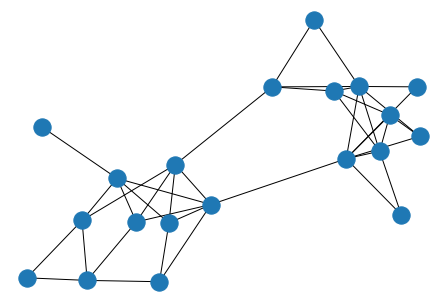

In [94]:
nx.draw(g, pos)
plt.savefig("Original_Graph.png", format="png", dpi = 800)

In [51]:
g.edges()

EdgeView([(0, 4), (0, 7), (0, 8), (0, 9), (1, 8), (2, 4), (2, 5), (2, 7), (2, 8), (3, 6), (3, 7), (3, 8), (3, 9), (4, 5), (4, 7), (4, 8), (4, 18), (5, 9), (6, 9), (7, 13), (10, 12), (10, 18), (11, 12), (11, 13), (12, 13), (12, 14), (12, 17), (12, 18), (12, 19), (13, 19), (14, 15), (14, 18), (15, 17), (15, 18), (15, 19), (16, 17), (16, 18), (17, 18), (17, 19)])

In [52]:
set_original_edges = list(g.edges())

True

## Bernoulli Distribution

In [41]:
edge_list = torch.tensor(np.array(g.edges).T).cuda()

In [42]:
edge_list_bern = bernoulli_pert(edge_list, 20, 1, 0.1)

In [56]:
edge_list_bern = edge_list_bern.cpu().numpy().T

In [85]:
G_bern = nx.Graph()  # or DiGraph, MultiGraph, MultiDiGraph, etc
G_bern.add_nodes_from(range(20))
G_bern.add_edges_from(edge_list_bern)

for el in edge_list_bern:
    if ((el[0], el[1]) in set_original_edges) or ((el[1], el[0]) in set_original_edges):
        G_bern[el[0]][el[1]]['color'] = 'k'
    else:
        G_bern[el[0]][el[1]]['color'] = 'r'
colors_bern = [G_bern[u][v]['color'] for u,v in G_bern.edges()]

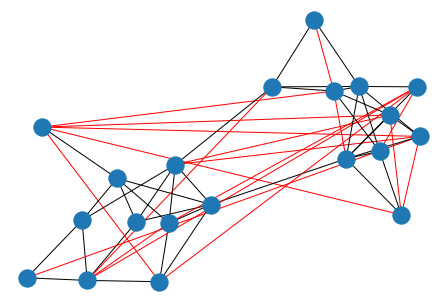

In [95]:
nx.draw(G_bern, pos, edge_color=colors_bern)
plt.savefig("Bern_Graph.png", format="png", dpi = 800)

## Community Distribution

In [100]:
community_node = torch.tensor(np.array([[0,1,2,3,4,5,6,7,8,9], [10,11,12,13,14,15,16,17,18,19]]))
community_size = torch.tensor(np.array([10,10]))
community_prob = torch.tensor(np.array([[0.4, 0.05],[0.05, 0.4]]))

edge_list = torch.tensor(np.array(g.edges).T).cuda()
edge_list_com = community_pert(edge_list, 20, 1, 0.4, community_node, community_size, community_prob)
edge_list_com = edge_list_com.cpu().numpy().T

In [101]:
G_com = nx.Graph()  # or DiGraph, MultiGraph, MultiDiGraph, etc
G_com.add_nodes_from(range(20))
G_com.add_edges_from(edge_list_com)

for el in edge_list_com:
    if ((el[0], el[1]) in set_original_edges) or ((el[1], el[0]) in set_original_edges):
        G_com[el[0]][el[1]]['color'] = 'k'
    else:
        G_com[el[0]][el[1]]['color'] = 'r'
colors_com = [G_com[u][v]['color'] for u,v in G_com.edges()]

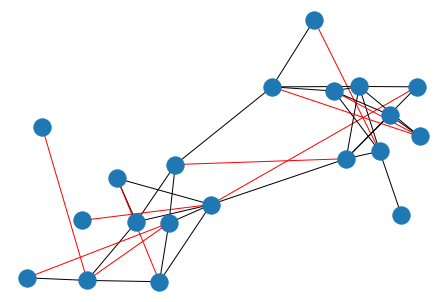

In [102]:
nx.draw(G_com, pos, edge_color=colors_com)
plt.savefig("Com_Graph2.png", format="png", dpi = 800)